In [1]:
import nltk
nltk.download('punkt')
from nltk import *
import numpy as np
from urllib import request
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import svm
from scipy.optimize import curve_fit
from PyDictionary import PyDictionary
from vocabulary.vocabulary import Vocabulary as vb
# for the dependencies, all the libraries are present in Anaconda except PyDictionary and vocabulary
# for installing the same run pip install PyDictionary and pip install vocabulary respectively

d=PyDictionary()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Meet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
url = "http://www.gutenberg.org/files/84/84-0.txt"  # Corpus used: Frankenstein, by Mary Wollstonecraft (Godwin) Shelley
res = request.urlopen(url)
text = res.read().decode('utf8')
text= text.lower()
# loading the corpus from the Ebook itself hence NOTE that there might be some extra text in the corpus too

In [3]:
tokensize = word_tokenize(text) # tokenizer can be used only when 'punkt' has been downloaded

In [4]:
print("TTR: "+str(len(list(set(tokensize)))/len(tokensize)))

TTR: 0.08695015488594762


In [5]:
counter=Counter(tokensize) # used to get the frequencies of each of the unique tokens
counts=list(counter.values())
tokens=counter.keys()

In [6]:
toke=list(tokens)

#meaning=np.zeros(len(toke))
wordlength=np.zeros(len(toke))

In [9]:
# For getting the number of meanings I am using the PyDictionary and not the file shared by Professor as according to me 
# PyDictionary is vast
# NOTE THAT IF THIS CELL GIVES ERROR THEN THE REASON MIGHT BE THAT THE MEANING OF THE WORD MIGHT NOT BE AVAILABLE IN 
# PyDictionary, hence run the cell again for new random words. For example "," has no meaning as a word.
num_meaning=10
meaning=np.zeros(num_meaning)
for i in range(meaning.shape[0]):
    n=np.random.randint(0,len(toke))
    meani=d.meaning(toke[n]) 
    parts=list(meani)  # whether the word is a Noun or Verb or adjective and so on
    s=0
    for j in range(len(parts)):  # for each part of speech how many meanings does the word have
        s=s+len(meani[parts[j]]) 
    meaning[i]=s
    #wordlength[i]=len(toke)
    #if vb.meaning(toke[np.random.randint(0,len(toke))])!=False:
    #    meaning[i]=len(vb.meaning(toke[np.random.randint(0,len(toke))], format='list')) 
# used to calculate the number of meanings of a word based on vocabulary python library

F:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file F:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [10]:
for i in range(wordlength.shape[0]):
    wordlength[i]=len(toke[i])

In [11]:
ranks=np.arange(1,len(counts)+1)
indices= np.argsort(-1*np.array(counts))
freq=np.array(counts)[indices]

In [28]:
# For getting the number of meanings I am using the PyDictionary and not the file shared by Professor as according to me 
# PyDictionary is vast
# NOTE THAT IF THIS CELL GIVES ERROR THEN THE REASON MIGHT BE THAT THE MEANING OF THE WORD MIGHT NOT BE AVAILABLE IN 
# PyDictionary, hence run the cell again for new random words. For example "," has no meaning as a word.
num_meaning=10
meaning=np.zeros(num_meaning)
freq_mean=np.zeros(num_meaning)
for i in range(meaning.shape[0]):
    n=np.random.randint(0,indices.shape[0])
    meani=d.meaning(list(tokens)[n])
    parts=list(meani)
    s=0
    for j in range(len(parts)):
        s=s+len(meani[parts[j]])
    meaning[i]=s
    freq_mean[i]=freq[indices[n]] # frequencies related to the random tokens chosen

F:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file F:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


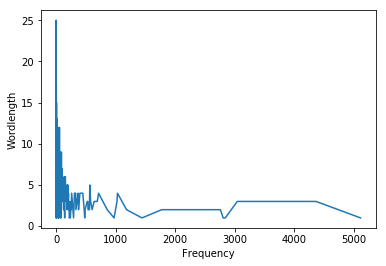

In [17]:
plt.plot(freq, np.array(wordlength)[indices])
plt.xlabel("Frequency")
plt.ylabel("Wordlength")
plt.show()
#plt.savefig("l_f.png")
#plt.close()

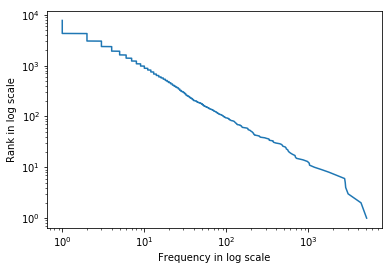

In [18]:
plt.loglog(freq, ranks)
plt.xlabel("Frequency in log scale")
plt.ylabel("Rank in log scale")
plt.show()
#plt.savefig("Zipf_Law.png")
#plt.close()

In [19]:
num=1000

splt=np.array_split(tokensize, num)

voc=np.zeros(num)
tok=np.zeros(num)

In [20]:
for i in range(num):
    tok[i]=len(list(splt[i]))
    voc[i]=len(list(set(splt[i])))

In [21]:
tok=np.array([sum(tok[:i+1]) for i in range(num)])
voc=np.array([sum(voc[:i+1]) for i in range(num)])

#toki=tok.reshape(-1,1)
#cl=svm.SVR(kernel='poly')
#cl.fit(toki,voc)

def heap(tokens, k, beta):
    return k*((tokens)**beta)


In [22]:
popt, pcov= curve_fit(heap, tok, voc)

K=popt[0]
beta=popt[1]

print("K: "+str(K))
print("beta: "+str(beta))

K: 0.7672551937972026
beta: 0.9917567634823897


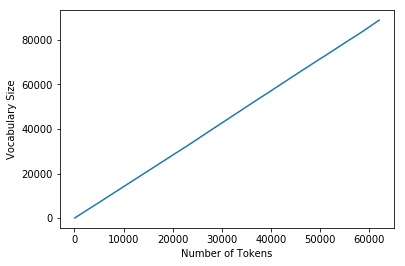

In [23]:
plt.plot(voc, tok)
plt.xlabel("Number of Tokens")
plt.ylabel("Vocabulary Size")
plt.show()
#plt.savefig("Heaps_Law.png")
#plt.close()

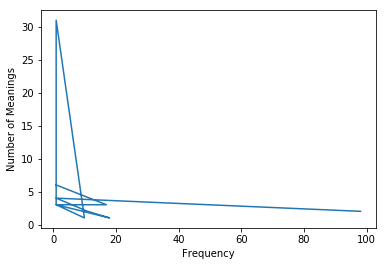

In [29]:
plt.plot(freq_mean, meaning)
plt.xlabel("Frequency")
plt.ylabel("Number of Meanings")
plt.show()
#plt.savefig("m_f.png")
#plt.close()


# AS the number of points were quite less the plot looks somewhat deceptive however the concept is visualized by the fact 
# that more the frequency less would be the meaning for that word and vice versa  